# Introduction to Python Workshop

**Dr Paul J van Staden**

**17 September 2024**

# Basic statistical analysis: Numerical variables

In this section we will cover the following:

*   Exploratory data analysis:
 -   Measures of location: Mean & median
 -   Five-number summary
 -   Measures of variability: Standard deviation & interquartile range
*   Correlation & regression analysis

The data used for this section are:

1.   Data on the level of anxiety experienced by arachnophobes when interacing with spiders (adapted from Field (2009))

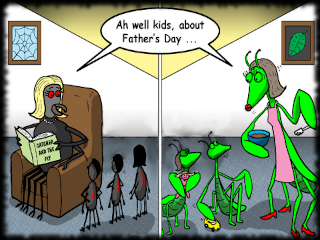

2.   Data on animals compiled from the South African Super Animals Trump cards.

*Data sources:*

    Field, A. (2009). Discovering Statistics using SPSS (and sex and drugs and rock ’n’ roll), SAGE Publications Ltd, London, UK.
    South African National Parks and Pick n Pay (2017). South African Super Animals Trump Cards.

# Exploratory data analysis
## Example: Arachnophobia

In a study on arachnophobia (the fear of spiders), 24 arachnophobes (persons fearing spiders) had to interact with spiders of different sizes. During each interaction, the level of anxiety of the arachnophobe was measured through galvanic skin response (GSR).

Consider the following two variables for $i=1,2,...,24$:

$y_{i}:$ The GSR measurement for the level of anxiety of the $i^{\text{th}}$ arachnophobe.

$x_{i}:$ The size of the spider in centimeters (cm) for the $i^{\text{th}}$ arachnophobe.


Import the necessary packages.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Import the data set.

In [ ]:
staycalm = pd.read_csv("Spiders.csv")
staycalm

,GSR,Size
0,15,3.0
1,20,4.3
2,30,9.2
3,25,7.6
4,35,13.0
5,18,6.4
6,40,9.9
7,10,3.3
8,11,5.6
9,28,12.0


Calculate descriptive measures of location and of variation for the GSR measurements.

In [ ]:
GSR_summary = staycalm["GSR"].describe()
GSR_summary

,GSR
count,24.000000
mean,28.541667
std,11.382592
min,10.000000
25%,19.500000
50%,27.500000
75%,37.250000
max,50.000000


Compare the average and median GSR measurements.

In [ ]:
GSR_mean = staycalm["GSR"].mean()
print(f"The average GSR measurement is {round(GSR_mean,2)}")
GSR_median = staycalm["GSR"].median()
print(f"The median GSR measurement is {round(GSR_median,2)}")

The average GSR measurement is 28.54
The median GSR measurement is 27.5


Calculate the standard deviation and the interquartile range for the GSR measurements.

In [ ]:
GSR_std = staycalm["GSR"].std()
print(f"The standard deviation of the GSR measurements is {round(GSR_std,2)}")
GSR_iqr = GSR_summary["75%"] - GSR_summary["25%"]
print(f"The interquartile range of the GSR measurements is {round(GSR_iqr,2)}")

The standard deviation of the GSR measurements is 11.38
The interquartile range of the GSR measurements is 17.75


Calculate descriptive measures of location and of variation for the sizes of the spiders.

In [ ]:
Size_summary = staycalm["Size"].describe()
Size_summary

,Size
count,24.000000
mean,8.945833
std,3.634973
min,3.000000
25%,5.825000
50%,9.350000
75%,11.675000
max,15.000000


Compare the average and median sizes of the spiders.

In [ ]:
Size_mean = staycalm["Size"].mean()
print(f"The average size of the spiders is {round(Size_mean,2)} cm")
Size_median = staycalm["Size"].median()
print(f"The median size of the spiders is {round(Size_median,2)} cm")

The average size of the spiders is 8.95 cm
The median size of the spiders is 9.35 cm


Calculate the standard deviation and the interquartile range for the sizes of the spiders.

In [ ]:
Size_std = staycalm["Size"].std()
print(f"The standard deviation of the size of the spiders is {round(Size_std,2)} cm")
Size_iqr = Size_summary["75%"] - Size_summary["25%"]
print(f"The interquartile range of the size of the spiders is {round(Size_iqr,2)} cm")

The standard deviation of the size of the spiders is 3.63 cm
The interquartile range of the size of the spiders is 5.85 cm


## Exercise: South African birds

Consider the following variables for 108 animals:

*   Card number
*   Type of animal
*   Habitat
*   Species
*   Age in years
*   Weight in kilograms
*   Size in centimeters
*   Speed in kilometer per hour
*   Vulnerability status scaled from 1 (highest risk) to 4 (lowest risk)

Focusing on the 36 birds in the data set, calculate descriptive measures of location and of variation for the various numerical variables.

# Correlation and regression analysis
## Example: Arachnophobia

Consider again the following two variables for $i=1,2,...,24$:

$y_{i}:$ The GSR measurement for the level of anxiety of the $i^{\text{th}}$ arachnophobe.

$x_{i}:$ The size of the spider in centimeters (cm) for the $i^{\text{th}}$ arachnophobe.

Get the values for $y$ and for $x$ from the data set.

In [ ]:
y = staycalm["GSR"]
x = staycalm["Size"]
print(y)
print(x)

0     15
1     20
2     30
3     25
4     35
5     18
6     40
7     10
8     11
9     28
10    26
11    36
12    27
13    17
14    34
15    41
16    50
17    43
18    37
19    21
20    14
21    38
22    45
23    24
Name: GSR, dtype: int64
0      3.0
1      4.3
2      9.2
3      7.6
4     13.0
5      6.4
6      9.9
7      3.3
8      5.6
9     12.0
10    10.4
11    13.9
12     5.9
13     4.7
14     9.5
15    11.3
16    15.0
17    11.9
18    10.7
19     6.5
20     5.3
21    11.6
22    14.8
23     8.9
Name: Size, dtype: float64


Calculate and interpret the correlation coefficient between the sizes of the spiders and the GSR measurements.

In [ ]:
r = np.corrcoef(x, y)
print(r)
print(f"The value of the correlation coefficient is {round(r[0,1],1)}")

[[1.         0.89415025]
 [0.89415025 1.        ]]
The value of the correlation coefficient is 0.9


There is a strong positive linear relation between the sizes of the spiders and the GSR measurements.

### Characteristics of the correlation coefficient:

*   $r$ is only a measure of **LINEAR** dependence.
*   $-1\leq r\leq 1$
*   $r_{x,y}=r_{y,x}$
*   $r$ is independent of the units and the scale in which $x$ and $y$ are measured.
*   If $x$ and $y$ are independent, then $r = 0$.
*   But if $r = 0$, then $x$ and $y$ are not necessarily independent.
*   $r$ cannot be used to describe cause-and-effect relationships.

### Correlation analysis vs regression analysis:

*   With **CORRELATION ANALYSIS** the strength of the linear relation between two variables is measured.
*   With **REGRESSION ANALYSIS** the population mean value of the response variable is estimated in terms of known values of the explanatory variable.

### Simple linear regression model

*   Population regression line: $y_{i}=\beta _{0}+\beta _{1}x_{i}$

 -   $x:$ explanatory or predictor variable
 -   $y:$ response variable
 -   $\beta _{0}:$ intercept parameter which gives the mean value of $y$ for $x = 0$.
 -   $\beta _{1}:$ slope parameter which gives the change in the mean value of $y$ for a unit increase in the value of $x$.

*   Sample regression line: $\widehat{y}_{i}=b_{0}+b_{1}x_{i}$

 -   $\widehat{y}_{i}:$ estimator of the mean value of $y$ for a given value of $x$.
 -   $b_{0}:$ point estimate of the intercept parameter $\beta _{0}$.
 -   $b_{1}:$ point estimate of the slope parameter $\beta _{1}$.

---

Fit a linear regression model using the sizes of the spiders to
explain the GSR measurements.

In [ ]:
# Reshape x to have one column (and 24 rows)
x = np.array(x).reshape(-1,1)
print(x)
# Fit the regression model
lrm_spider = LinearRegression().fit(x, y)

[[ 3. ]
 [ 4.3]
 [ 9.2]
 [ 7.6]
 [13. ]
 [ 6.4]
 [ 9.9]
 [ 3.3]
 [ 5.6]
 [12. ]
 [10.4]
 [13.9]
 [ 5.9]
 [ 4.7]
 [ 9.5]
 [11.3]
 [15. ]
 [11.9]
 [10.7]
 [ 6.5]
 [ 5.3]
 [11.6]
 [14.8]
 [ 8.9]]


Point estimate for intercept parameter:

In [ ]:
lrm_spider_inter = lrm_spider.intercept_
print(f"The intercept for the fitted linear regression line is {round(lrm_spider_inter,1)}")

The intercept for the fitted linear regression line is 3.5


Point estimate for slope parameter:

In [ ]:
lrm_spider_slope = lrm_spider.coef_
print(f"The slope for the fitted linear regression line is {round(lrm_spider_slope[0],1)}")

The slope for the fitted linear regression line is 2.8


Fitted regression line: $\widehat{y}_{i}=3.5 + 2.8 x_{i}$

*   $b_{0}=3.5:$
 -   The mean GSR measurement for a spider of 0 cm is 3.5.
*   $b_{1}=2.8:$
 -   If the size of the spider that the arachnophobe has to interact with is increased by 1 cm, the mean GSR measurement will increase by 2.8.

---

### Predicted values and residuals

*   Fitted regression line: $\widehat{y}_{i}=b_{0}+b_{1}x_{i}$
*   Difference between the observed and the predicted values of
the response variable: $e_{i}=y_{i}-\widehat{y}_{i}$
 -   $y_{i}:$ observed value of the response variable
 -   $\widehat{y}_{i}:$ predicted value of the response variable
 -   $e_{i}:$ residual

---

Predict the GSR measurement for Nosnow Cannotski who had to
interact with a spider of 13 cm and calculate the corresponding
residual.

In [ ]:
yhat = lrm_spider.predict(x)
print(f"The predicted GSR measurement for Nosnow Cannotski is {round(yhat[4],1)}")
e = y - yhat
print(f"The residual for Nosnow Cannotski is {round(e[4],1)}")

The predicted GSR measurement for Nosnow Cannotski is 39.9
The residual for Nosnow Cannotski is -4.9


Predicted GSR measurement for Nosnow Cannotski:

*   $\widehat{y}_{5}=3.5+2.8x_{5}=3.5+2.8\times 13=39.9$

Residual for Nosnow Cannotski:

*   $e_{5}=y_{5}-\widehat{y}_{5}=35-39.9=-4.9$
*   Since $e_{5}<0$, the GSR measurement of Nosnow Cannotski is **OVERESTIMATED** by the fitted regression model.

---

### Least squares regression line

*   We want the residuals to be as small as possible.
*   Sum of the residuals:
 -   $\sum e_{i}=0$
 -   Cannot minimise this sum.
*   Sum of the absolute residuals:
 -   $\sum \left\vert e_{i}\right\vert$
 -   Mathematically possible, but practically not helpful to minimse this sum.
*   Sum of the squared residuals:
 -   $\sum e_{i}^{2}$
 -   Minimising this sum gives the **LEAST SQUARES REGRESSION LINE**.

---

### Goodness-of-fit: $R^{2}$

*   Total variation: $\sum \left( y_{i}-\overline{y}\right) ^{2}$
*   Explained variation: $\sum \left( \widehat{y}_{i}-\overline{y}\right) ^{2}$
*   Unexplained variation: $\sum \left( y_{i}-\widehat{y}_{i}\right) ^{2}=\sum e_{i}^{2}$
*   Percentage of the total variation in the response variable
explained by the fitted regression line:
 -   $R^{2}=\frac{\sum \left( \widehat{y}_{i}-\overline{y}\right) ^{2}}{\sum
\left( y_{i}-\overline{y}\right) ^{2}}=1-\frac{\sum \left( y_{i}-\widehat{y}%
_{i}\right) ^{2}}{\sum \left( y_{i}-\overline{y}\right) ^{2}}$
*   $0\leq R^{2}\leq 1$

---

Calculate and interpret $R^{2}$ for the fitted regression line.

In [ ]:
r_sq = lrm_spider.score(x, y)
print(f"The value of R-squared is {round(r_sq,1)}")

The value of R-squared is 0.8


80% of the variation in the GSR measurements is explained by the fitted regression line with the sizes of spiders as explanatory variable.

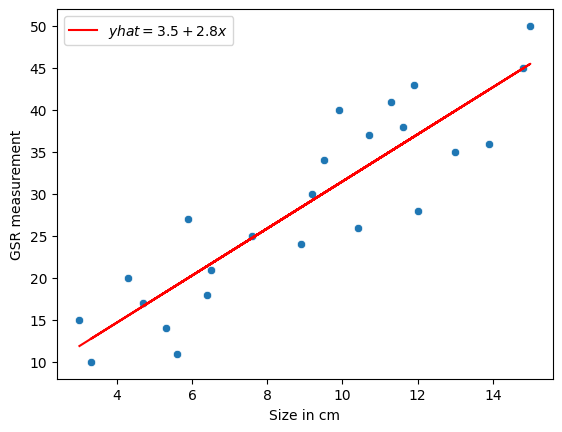

In [ ]:
sns.scatterplot(data = staycalm, x = "Size", y = "GSR")
plt.plot(x, yhat, color = "red",
         label = rf"$yhat = {round(lrm_spider_inter,1)} + {round(lrm_spider_slope[0],1)}x$")
plt.xlabel("Size in cm")
plt.ylabel("GSR measurement")
plt.legend()
plt.show()